In [11]:
import pandas as pd
from DesafioNetflix import calculaAuto
import numpy as np
import random
import matplotlib.pyplot as plt
from DesafioNetflix import escolheAleatorio
import matplotlib.pyplot as plt

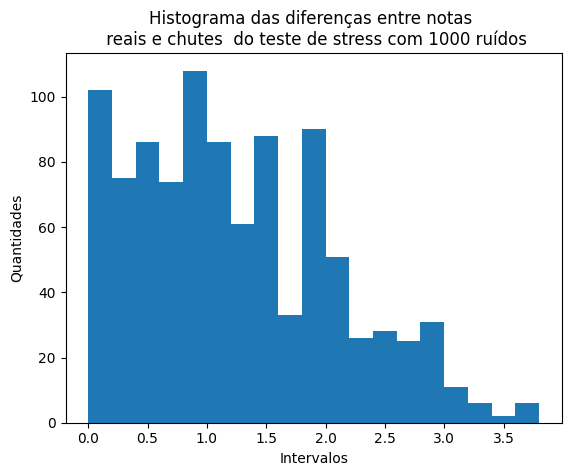

In [18]:
#Teste de stress para 1000 ruídos

df = pd.read_csv('ratings_small_formated.csv', sep=',',index_col=0)

num_originais = []
linhas = []
colunas = []
diferencas_mil = []
indices_validos = np.argwhere(~np.isnan(df.values))
for p in range(1000):
    indice_aleatorio = np.random.choice(len(indices_validos))
    linha, coluna = indices_validos[indice_aleatorio]
    elemento = df.iloc[linha, coluna]
    B = df.to_numpy()
    num_originais.append(B[linha][coluna])
    linhas.append(linha)
    colunas.append(coluna)

B = df.copy()
B = B.fillna(2.5)
B = B.to_numpy()
for i in range(len(colunas)):
  B[linhas[i]][colunas[i]] = random.randrange(1,6)


sigma, U, V_transposto = calculaAuto(B)
B = U@sigma@V_transposto
for m in range(len(linhas)):
    diferenca = abs(B[linhas[m]][colunas[m]] - num_originais[m])
    diferencas_mil.append(diferenca)

with open('dif_mil.txt', 'w') as f:
  f.write(str(diferencas_mil))


with open("dif_mil.txt", "r") as f:
  data = (f.read())
  data = eval(data)
  
  bins = []

# Loop for para gerar os 20 elementos
  for i in range(20):
      # Adicionar o próximo elemento à lista, que é o índice multiplicado por 0.2
      bins.append(i * 0.2)


  plt.title("Histograma das diferenças entre notas \n reais e chutes  do teste de stress com 1000 ruídos")
  plt.xlabel("Intervalos")
  plt.ylabel("Quantidades")  
  plt.hist(data,bins = bins)
  plt.show()

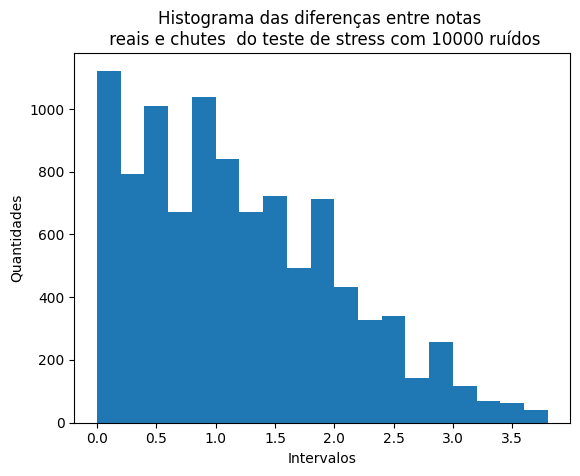

In [19]:
#Teste de stress para 10000 ruídos

df = pd.read_csv('ratings_small_formated.csv', sep=',',index_col=0)

num_originais = []
linhas = []
colunas = []
diferencas_mil = []
indices_validos = np.argwhere(~np.isnan(df.values))
for p in range(10000):
    indice_aleatorio = np.random.choice(len(indices_validos))
    linha, coluna = indices_validos[indice_aleatorio]
    elemento = df.iloc[linha, coluna]
    B = df.to_numpy()
    num_originais.append(B[linha][coluna])
    linhas.append(linha)
    colunas.append(coluna)

B = df.copy()
B = B.fillna(2.5)
B = B.to_numpy()
for i in range(len(colunas)):
  B[linhas[i]][colunas[i]] = random.randrange(1,6)


sigma, U, V_transposto = calculaAuto(B)
B = U@sigma@V_transposto
for m in range(len(linhas)):
    diferenca = abs(B[linhas[m]][colunas[m]] - num_originais[m])
    diferencas_mil.append(diferenca)

with open('dif_10mil.txt', 'w') as f:
  f.write(str(diferencas_mil))


with open("dif_10mil.txt", "r") as f:
  data = (f.read())
  data = eval(data)
  
  bins = []

# Loop for para gerar os 20 elementos
  for i in range(20):
      # Adicionar o próximo elemento à lista, que é o índice multiplicado por 0.2
      bins.append(i * 0.2)


  plt.title("Histograma das diferenças entre notas \n reais e chutes  do teste de stress com 10000 ruídos")
  plt.xlabel("Intervalos")
  plt.ylabel("Quantidades")  
  plt.hist(data,bins = bins)
  plt.show()

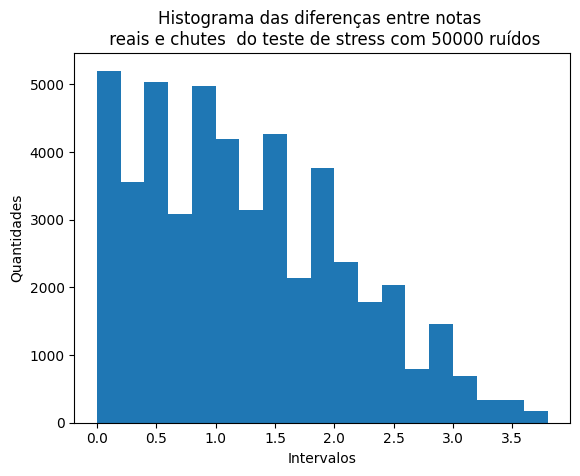

In [20]:
#Teste de stress para 50000 ruídos

df = pd.read_csv('ratings_small_formated.csv', sep=',',index_col=0)

num_originais = []
linhas = []
colunas = []
diferencas_mil = []
indices_validos = np.argwhere(~np.isnan(df.values))
for p in range(50000):
    indice_aleatorio = np.random.choice(len(indices_validos))
    linha, coluna = indices_validos[indice_aleatorio]
    elemento = df.iloc[linha, coluna]
    B = df.to_numpy()
    num_originais.append(B[linha][coluna])
    linhas.append(linha)
    colunas.append(coluna)

B = df.copy()
B = B.fillna(2.5)
B = B.to_numpy()
for i in range(len(colunas)):
  B[linhas[i]][colunas[i]] = random.randrange(1,6)


sigma, U, V_transposto = calculaAuto(B)
B = U@sigma@V_transposto
for m in range(len(linhas)):
    diferenca = abs(B[linhas[m]][colunas[m]] - num_originais[m])
    diferencas_mil.append(diferenca)

with open('dif_50mil.txt', 'w') as f:
  f.write(str(diferencas_mil))


with open("dif_50mil.txt", "r") as f:
  data = (f.read())
  data = eval(data)
  
  bins = []

# Loop for para gerar os 20 elementos
  for i in range(20):
      # Adicionar o próximo elemento à lista, que é o índice multiplicado por 0.2
      bins.append(i * 0.2)


  plt.title("Histograma das diferenças entre notas \n reais e chutes  do teste de stress com 50000 ruídos")
  plt.xlabel("Intervalos")
  plt.ylabel("Quantidades")  
  plt.hist(data,bins = bins)
  plt.show()